# Computer Vision Image analysis 

In [102]:
import requests
from io import BytesIO #16진수를 bite단위로 재구성하는 lib
from PIL import Image 

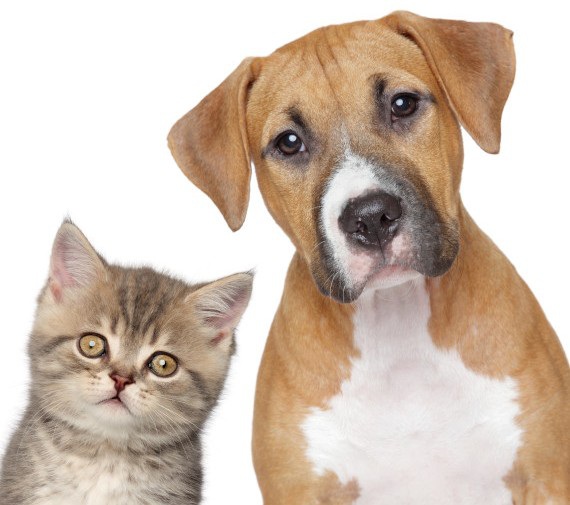

In [103]:
img_URL='https://search.pstatic.net/common/?src=http%3A%2F%2Fmodo.phinf.naver.net%2F20161224_278%2F1482546190713RwRDg_PNG%2FmosaKpNj20.png&type=sc960_832'
response = requests.get(img_URL)

#jupyter notebook 이미지 미리보기 
response.content # \x : text file이 아님  16진수
img=BytesIO(response.content)
image=Image.open(img)
image

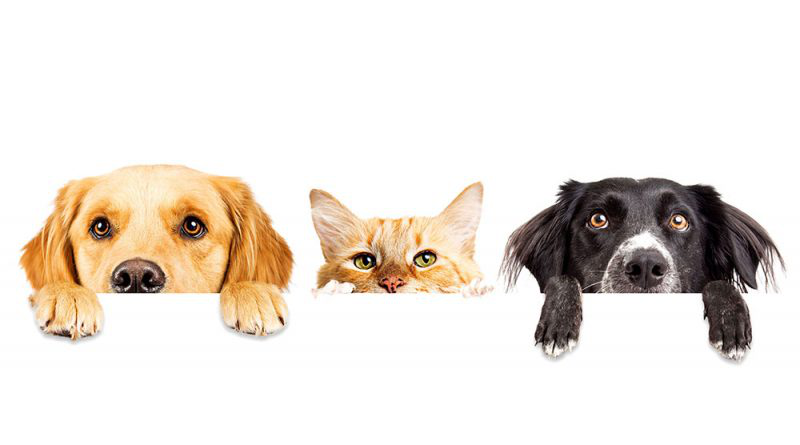

In [104]:
#위의 코드를 간편화
img_URL='https://thistime.ca/wp-content/uploads/2018/11/shutterstock_1034939470-800x445.jpg'
image=Image.open(BytesIO(requests.get(img_URL).content))
image

In [105]:
# 필요한 값들을 준비
key='af307ce16f3949f9a0c552f9a7717a08'
endpoint='https://labuser91computervision2.cognitiveservices.azure.com/'+'vision/v3.2/'

In [106]:
analyze_endpoint=endpoint+'analyze' #이미지 분석
detect_endpoint=endpoint+'detect' #개체 감지

In [107]:
header={'Ocp-Apim-Subscription-Key': key}
params={'visualFeatures': 'Categories,Description,Color'}
data={'url':img_URL}

In [108]:
response= requests.post(analyze_endpoint, 
              headers=header,
              params=params,
              json=data)

In [109]:
result=response.json()
result

{'categories': [],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': 'BD740E',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['dog',
   'laying',
   'indoor',
   'brown',
   'mammal',
   'lying',
   'staring'],
  'captions': [{'text': 'a group of dogs and a cat',
    'confidence': 0.5871330499649048}]},
 'requestId': 'e41dc813-ef8b-4dd9-a15e-48e6d835b497',
 'metadata': {'height': 445, 'width': 800, 'format': 'Jpeg'},
 'modelVersion': '2021-05-01'}

In [110]:
result['description']['captions'][0]['text'] #list에서 index번호를 준다

'a group of dogs and a cat'

----

In [111]:
# Object Detection

headers = {'Ocp-Apim-Subscription-Key': key}
params={}
data={'url': img_URL}

In [112]:
response= requests.post(detect_endpoint,
                        headers=headers,
                        params=params,
                        json=data)

In [113]:
result=response.json()
result

{'objects': [{'rectangle': {'x': 300, 'y': 177, 'w': 209, 'h': 128},
   'object': 'cat',
   'confidence': 0.799,
   'parent': {'object': 'mammal',
    'confidence': 0.816,
    'parent': {'object': 'animal', 'confidence': 0.817}}},
  {'rectangle': {'x': 8, 'y': 160, 'w': 295, 'h': 184},
   'object': 'golden retriever',
   'confidence': 0.562,
   'parent': {'object': 'retriever',
    'confidence': 0.644,
    'parent': {'object': 'dog',
     'confidence': 0.863,
     'parent': {'object': 'mammal',
      'confidence': 0.866,
      'parent': {'object': 'animal', 'confidence': 0.866}}}}},
  {'rectangle': {'x': 495, 'y': 167, 'w': 296, 'h': 200},
   'object': 'dog',
   'confidence': 0.845,
   'parent': {'object': 'mammal',
    'confidence': 0.852,
    'parent': {'object': 'animal', 'confidence': 0.853}}}],
 'requestId': '1e1d0ed5-630a-4729-afb5-9146841ca3b3',
 'metadata': {'height': 445, 'width': 800, 'format': 'Jpeg'},
 'modelVersion': '2021-04-01'}

---
##image size
- 8X8 : 256=2^8=8bit * 8 * 8 =16,384
- 16 * 640 * 480=4,915,200

#### 사진의 사이즈가 너무 커서 압축이 필연적임
- 티 안 날 정도로 image를 손상 시켜 용량을 줄인다 
- JPEG, GIF, PNG 형식으로 포멧함

#### 동영상 size
  - 1024 * 768 * 2 * 24 * 60 * 60 (영상 size * bits * ??? * 시간단위

In [114]:
from PIL import Image,ImageDraw,ImageFont

draw=ImageDraw.Draw(image) #image에 그림을 그림

In [115]:
def MakeBox(res):
  objects=res['objects'] #objects 항목
  for obj in objects: #좌표계만 뽑기
    rect=obj['rectangle']
    print(rect)
    x=rect['x']
    y=rect['y']
    w=rect['w']
    h=rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline='red') #rectangle((좌표: tuple),(color))

    objectName=obj['object']
    draw.text((x,y),objectName,fill='red')

In [116]:
MakeBox(result)

{'x': 300, 'y': 177, 'w': 209, 'h': 128}
{'x': 8, 'y': 160, 'w': 295, 'h': 184}
{'x': 495, 'y': 167, 'w': 296, 'h': 200}


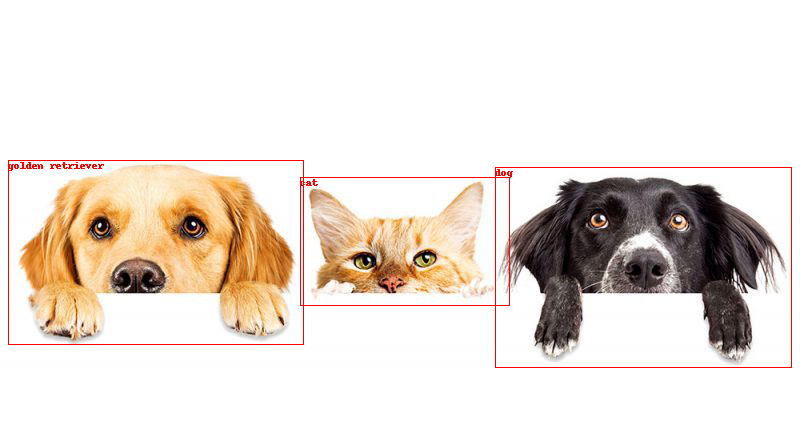

In [117]:
image

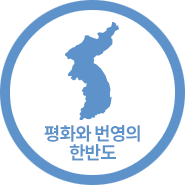

In [123]:
ocr_endpoint =endpoint+'ocr'

image_url1 = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"
image = Image.open(BytesIO(requests.get(image_url1).content))
image

In [129]:
headers = {'Ocp-Apim-Subscription-Key':key}
params = {'language' : 'unk','detectOrientation': 'true'} #unk(=unknown) : auto detect 됨 ,detectOrientation = 방향 맞춤
data = {'url':image_url1}

In [130]:
response = requests.post(ocr_endpoint,
                         headers=headers,
                         params=params,
                         json=data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}],
 'modelVersion': '2021-04-01'}

In [128]:
for reg in result['regions']:
  for line in reg['lines']:
    for word in line['words']:
      print(word['text'])

평화와
번영의
한반도
